In [21]:
import pandas as pd

# Define the path to your cleaned file
file_path = 'D:/DATA FOR RESEARCH PROJECT/Clean data/pacemakerClean2.csv'

# Define columns to keep
columns_to_keep = [
    'MDR_REPORT_KEY', 'DATE_RECEIVED_x', 'DATE_RECEIVED_y', 'FOI_TEXT', 
    'ADVERSE_EVENT_FLAG', 'PRODUCT_PROBLEM_FLAG', 'GENERIC_NAME', 'DATE_OF_EVENT',
    'BRAND_NAME', 'MANUFACTURER_D_NAME', 'DEVICE_REPORT_PRODUCT_CODE', 
    'MANUFACTURER_D_COUNTRY_CODE', 'EXPIRATION_DATE_OF_DEVICE', 'DEVICE_AVAILABILITY', 
    'REPORT_SOURCE_CODE', 'PRODUCT_PROBLEM_FLAG', 'HEALTH_PROFESSIONAL'
]

# Load only required columns
df = pd.read_csv(file_path, usecols=columns_to_keep, low_memory=False)

# Quick sanity check
print(df.shape)
print(df.info())


(282572, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282572 entries, 0 to 282571
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   MDR_REPORT_KEY               282572 non-null  int64 
 1   DATE_RECEIVED_x              282572 non-null  object
 2   BRAND_NAME                   281075 non-null  object
 3   GENERIC_NAME                 282572 non-null  object
 4   MANUFACTURER_D_NAME          282454 non-null  object
 5   MANUFACTURER_D_COUNTRY_CODE  266398 non-null  object
 6   EXPIRATION_DATE_OF_DEVICE    224078 non-null  object
 7   DEVICE_AVAILABILITY          282570 non-null  object
 8   DEVICE_REPORT_PRODUCT_CODE   282570 non-null  object
 9   FOI_TEXT                     282572 non-null  object
 10  REPORT_SOURCE_CODE           282572 non-null  object
 11  DATE_RECEIVED_y              282572 non-null  object
 12  ADVERSE_EVENT_FLAG           282207 non-null  object
 13  P

In [23]:
# Count nulls per column
# Identifying the columns having the most empty values
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts)

HEALTH_PROFESSIONAL            62983
EXPIRATION_DATE_OF_DEVICE      58494
DATE_OF_EVENT                  38039
MANUFACTURER_D_COUNTRY_CODE    16174
BRAND_NAME                      1497
ADVERSE_EVENT_FLAG               365
PRODUCT_PROBLEM_FLAG             214
MANUFACTURER_D_NAME              118
DEVICE_AVAILABILITY                2
DEVICE_REPORT_PRODUCT_CODE         2
MDR_REPORT_KEY                     0
DATE_RECEIVED_x                    0
GENERIC_NAME                       0
FOI_TEXT                           0
REPORT_SOURCE_CODE                 0
DATE_RECEIVED_y                    0
dtype: int64


In [13]:
# Look at how adverse event flag is distributed
print(df['ADVERSE_EVENT_FLAG'].value_counts(dropna=False))
print(df['ADVERSE_EVENT_FLAG'].value_counts(normalize=True))

ADVERSE_EVENT_FLAG
False    144028
True     138179
NaN         365
Name: count, dtype: int64
ADVERSE_EVENT_FLAG
False    0.510363
True     0.489637
Name: proportion, dtype: float64


In [31]:
# converting date and seeing the years
df['DATE_RECEIVED_x'] = pd.to_datetime(df['DATE_RECEIVED_x'], errors='coerce')
df['DATE_OF_EVENT']  = pd.to_datetime(df['DATE_OF_EVENT'], errors='coerce')

# Yearly counts
report_years = df['DATE_RECEIVED_x'].dt.year.value_counts().sort_index()
event_years  = df['DATE_OF_EVENT'].dt.year.value_counts().sort_index()
print(report_years)
print(event_years)

DATE_RECEIVED_x
2019    49847
2020    51008
2021    52992
2022    57981
2023    70744
Name: count, dtype: int64
DATE_OF_EVENT
1900.0        1
1982.0        1
1983.0        3
1984.0        2
1987.0        3
1988.0        2
1989.0        1
1990.0        2
1991.0        1
1992.0        5
1993.0        1
1994.0        1
1995.0        5
1996.0        8
1997.0        8
1998.0        7
1999.0       15
2000.0        8
2001.0       14
2002.0       14
2003.0       20
2004.0       21
2005.0       28
2006.0       29
2007.0       39
2008.0       52
2009.0       63
2010.0      123
2011.0      865
2012.0      432
2013.0      414
2014.0      263
2015.0      271
2016.0      627
2017.0      964
2018.0     6878
2019.0    46454
2020.0    45001
2021.0    46610
2022.0    50490
2023.0    44784
2024.0        3
Name: count, dtype: int64


In [33]:
# This tells us if there are many blank reports to drop or if you need to impute/flag them.
# Text-length distribution
df['text_length'] = df['FOI_TEXT'].str.len()
print(df['text_length'].describe())

# How many are empty?
print((df['text_length']==0).sum(), "empty narratives")

count    282572.000000
mean        361.446463
std         441.231245
min           1.000000
25%         110.000000
50%         205.000000
75%         351.000000
max        5282.000000
Name: text_length, dtype: float64
0 empty narratives


In [37]:
for col in ['GENERIC_NAME','BRAND_NAME','MANUFACTURER_D_NAME','DEVICE_REPORT_PRODUCT_CODE']:
    print(col, "→", df[col].nunique(), "unique values")
    print(df[col].value_counts().head(5), "\n")

GENERIC_NAME → 184 unique values
GENERIC_NAME
PERMANENT PACEMAKER ELECTRODE                       117926
ELECTRODE, PACEMAKER, PERMANENT                      35992
IMPLANTABLE PULSE GENERATOR, PACEMAKER (NON-CRT)     25362
IMPLANTABLE PACEMAKER PULSE GENERATOR                21971
DEFIBRILLATOR/PACEMAKER                              15993
Name: count, dtype: int64 

BRAND_NAME → 1444 unique values
BRAND_NAME
CAPSUREFIX NOVUS LEAD MRI SURESCAN    61565
TENDRIL STS                           23378
ASSURITY MRI                          12522
CAPSUREFIX NOVUS MRI SURESCAN         10525
R SERIES DEFIBRILLATOR                 7863
Name: count, dtype: int64 

MANUFACTURER_D_NAME → 314 unique values
MANUFACTURER_D_NAME
MPRI                                  88378
ST. JUDE MEDICAL, INC.(CRM-SYLMAR)    55504
BOSTON SCIENTIFIC CORPORATION         45474
ZOLL MEDICAL CORPORATION              16001
MEDTRONIC, INC.                       13840
Name: count, dtype: int64 

DEVICE_REPORT_PRODUCT_CODE → 48 

In [39]:
# lowercase, strip punctuation
df['GEN_NAME_clean'] = (
    df['GENERIC_NAME']
      .str.lower()
      .str.replace(r'[^a-z0-9 ]', '', regex=True)
      .str.strip()
)

# manual mapping for the big groups you saw
mapping = {
    'permanent pacemaker electrode': 'pacemaker electrode',
    'electrode pacemaker permanent':    'pacemaker electrode',
    'implantable pulse generator pacemaker noncrt': 'pulse generator (pacemaker)',
    'implantable pacemaker pulse generator':       'pulse generator (pacemaker)',
    'defibrillatorpacemaker':                     'defibrillator/pacemaker'
}
df['GEN_NAME_group'] = df['GEN_NAME_clean'].map(mapping).fillna(df['GEN_NAME_clean'])

In [43]:
# pick top 20 most frequent
top_brands = df['BRAND_NAME'].value_counts().nlargest(20).index
df['BRAND_top20'] = df['BRAND_NAME'].where(df['BRAND_NAME'].isin(top_brands), 'Other')

top_mfr = df['MANUFACTURER_D_NAME'].value_counts().nlargest(20).index
df['MFR_top20']   = df['MANUFACTURER_D_NAME'].where(df['MANUFACTURER_D_NAME'].isin(top_mfr), 'Other')

In [45]:
df[['GEN_NAME_group','BRAND_top20','MFR_top20']].nunique()
df['GEN_NAME_group'].value_counts().head()
df['BRAND_top20'].value_counts().head()
df['MFR_top20'].value_counts().head()

MFR_top20
MPRI                                  88378
ST. JUDE MEDICAL, INC.(CRM-SYLMAR)    55504
BOSTON SCIENTIFIC CORPORATION         45474
ZOLL MEDICAL CORPORATION              16001
MEDTRONIC, INC.                       13840
Name: count, dtype: int64

In [47]:
print("Unique GEN_NAME_group:", df['GEN_NAME_group'].nunique())
print(df['GEN_NAME_group'].value_counts().head(), "\n")

print("Unique BRAND_top20:", df['BRAND_top20'].nunique())
print(df['BRAND_top20'].value_counts().head(), "\n")

print("Unique MFR_top20:", df['MFR_top20'].nunique())
print(df['MFR_top20'].value_counts().head())

Unique GEN_NAME_group: 154
GEN_NAME_group
pacemaker electrode                                                             153978
pulse generator (pacemaker)                                                      47962
defibrillator/pacemaker                                                          15994
drug eluting permanent right ventricular rv or right atrial ra pacemaker ele     10722
drug eluting permanent right ventricular or atrial pacemaker electrodes          10418
Name: count, dtype: int64 

Unique BRAND_top20: 21
BRAND_top20
Other                                 98997
CAPSUREFIX NOVUS LEAD MRI SURESCAN    61565
TENDRIL STS                           23378
ASSURITY MRI                          12522
CAPSUREFIX NOVUS MRI SURESCAN         10525
Name: count, dtype: int64 

Unique MFR_top20: 21
MFR_top20
MPRI                                  88378
ST. JUDE MEDICAL, INC.(CRM-SYLMAR)    55504
BOSTON SCIENTIFIC CORPORATION         45474
ZOLL MEDICAL CORPORATION              16001
MEDTR

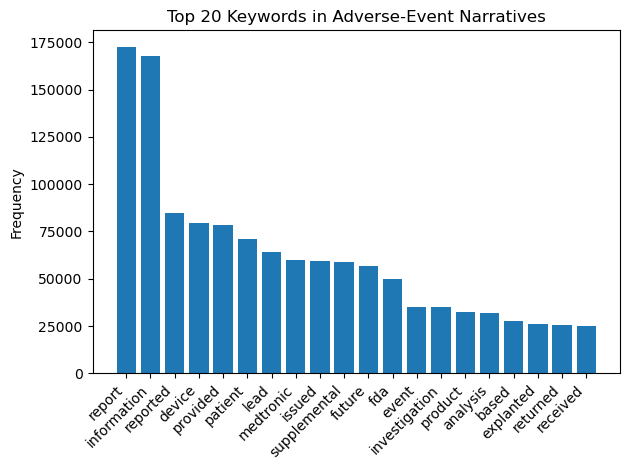

In [51]:
# Bar chart of the 20 most common words in FOI_TEXT when ADVERSE_EVENT_FLAG==1
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

texts = df.loc[df['ADVERSE_EVENT_FLAG']==1, 'FOI_TEXT'].dropna()
vec = CountVectorizer(stop_words='english', max_features=20)
X = vec.fit_transform(texts)
freq = pd.DataFrame({
    'keyword': vec.get_feature_names_out(),
    'count':    X.sum(axis=0).A1
}).sort_values('count', ascending=False)

plt.figure()
plt.bar(freq['keyword'], freq['count'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title('Top 20 Keywords in Adverse‑Event Narratives')
plt.tight_layout()
plt.show()

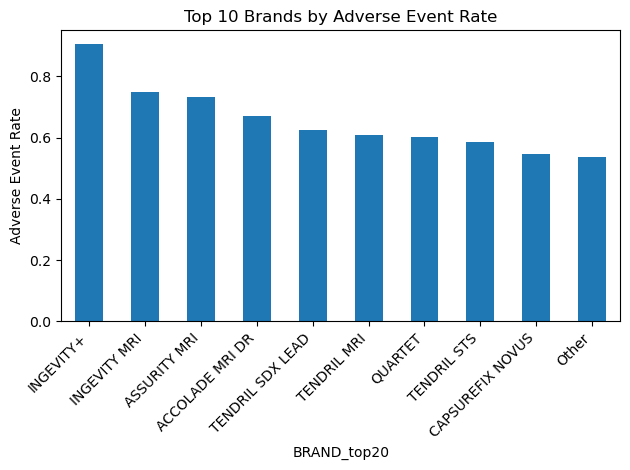

In [61]:
rate_by_brand = (
    df.groupby('BRAND_top20')['ADVERSE_EVENT_FLAG']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
rate_by_brand.plot(kind='bar')
plt.ylabel('Adverse Event Rate')
plt.title('Top 10 Brands by Adverse Event Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\samridhi\AppData\Local\Temp\ipykernel_10700\3586241038.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(0)


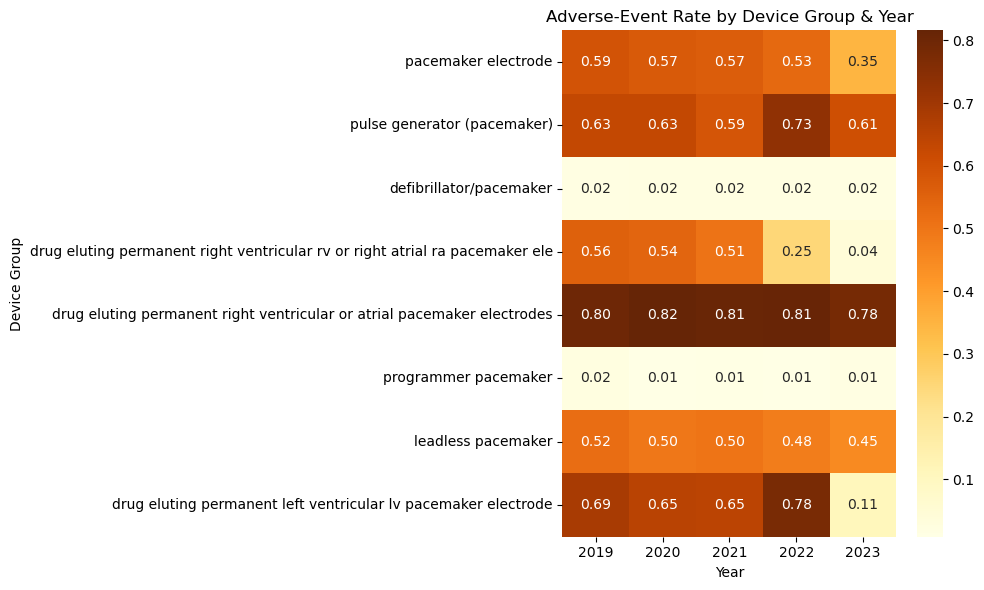

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

df['year'] = df['DATE_RECEIVED_x'].dt.year

# Correct pivot call with keyword args
pivot = (
    df.groupby(['GEN_NAME_group', 'year'])['ADVERSE_EVENT_FLAG']
      .mean()
      .reset_index()
      .pivot(index='GEN_NAME_group', columns='year', values='ADVERSE_EVENT_FLAG')
      .fillna(0)
)

# Select top 8 groups by report count
top8 = df['GEN_NAME_group'].value_counts().nlargest(8).index
pivot_top8 = pivot.loc[top8]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_top8, annot=True, fmt=".2f", cmap='YlOrBr')
plt.title('Adverse‑Event Rate by Device Group & Year')
plt.ylabel('Device Group')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

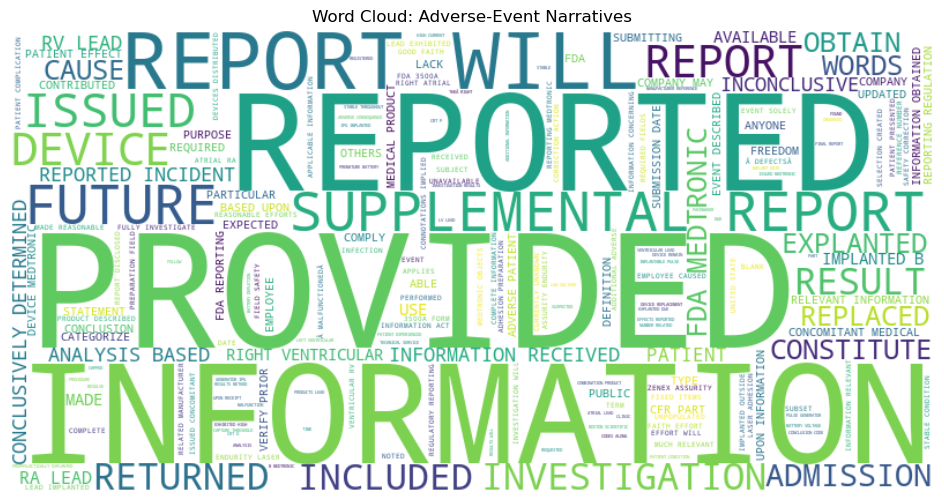

In [71]:
# Visualize the most salient terms when an adverse event occurs.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all adverse narratives
text = ' '.join(df.loc[df['ADVERSE_EVENT_FLAG']==1, 'FOI_TEXT'].dropna())

wc = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=None  # you can pass your own stopword list
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Adverse‑Event Narratives')
plt.show()

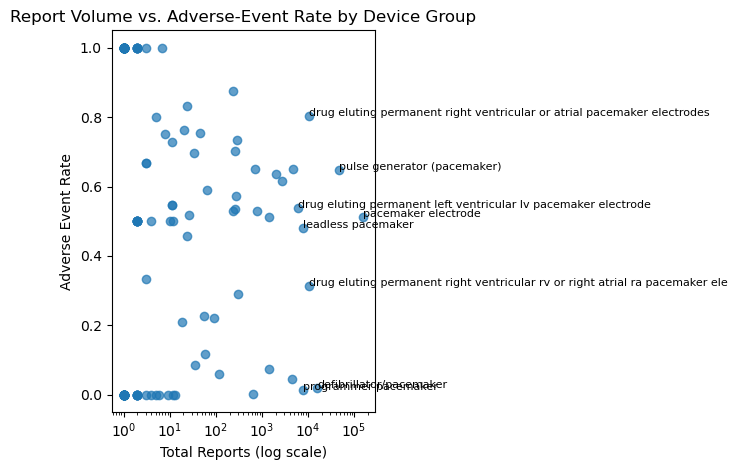

In [73]:
# Helps spot groups with both high volume and high risk.
# Recompute stats if necessary
stats = df.groupby('GEN_NAME_group')['ADVERSE_EVENT_FLAG'] \
          .agg(total_reports='count', adverse_rate='mean') \
          .reset_index()

plt.figure()
plt.scatter(stats['total_reports'], stats['adverse_rate'], alpha=0.7)
for _, row in stats.nlargest(8, 'total_reports').iterrows():
    plt.text(row['total_reports'], row['adverse_rate'], row['GEN_NAME_group'], fontsize=8)
plt.xscale('log')
plt.xlabel('Total Reports (log scale)')
plt.ylabel('Adverse Event Rate')
plt.title('Report Volume vs. Adverse‑Event Rate by Device Group')
plt.tight_layout()
plt.show()
